In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#import library upload file pada google colab
from google.colab import files
#mengupload file
dataupload = files.upload()

Saving covid19.xlsx to covid19.xlsx


In [ ]:
#import io untuk membaca dataset yang telah diupload
import io
#membaca data csv yang telah diupload dengan nama covid19
import pandas as pd
df = pd.read_excel(io.BytesIO(dataupload['covid19.xlsx']))
#menampilkan data yang telah dibaca
df.head()

,Lokasi,Lat,long,Dikonfirmasi,Sembuh,Meninggal Dunia
0,Aceh,4695135.0,96749397,7,4,1
1,Jakarta,-6.2,106816666,3260,286,298
2,West Java,-6914864.0,107608238,756,75,68
3,East Java,-7250445.0,112768845,603,101,58
4,Central Java,-6966667.0,110416664,449,51,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lokasi           34 non-null     object 
 1   Lat              34 non-null     float64
 2   long             34 non-null     int64  
 3   Dikonfirmasi     34 non-null     int64  
 4   Sembuh           34 non-null     int64  
 5   Meninggal Dunia  34 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ KB


In [ ]:
del df['Lokasi']

In [ ]:
df.head()

,Lat,long,Dikonfirmasi,Sembuh,Meninggal Dunia
0,4695135.0,96749397,7,4,1
1,-6.2,106816666,3260,286,298
2,-6914864.0,107608238,756,75,68
3,-7250445.0,112768845,603,101,58
4,-6966667.0,110416664,449,51,44


In [ ]:
#Scaling menggunakan minmax
mms = MinMaxScaler()
dfnew = mms.fit_transform(df)
dfnew = pd.DataFrame(dfnew,columns=df.columns)

In [ ]:
dfnew.head()

,Lat,long,Dikonfirmasi,Sembuh,Meninggal Dunia
0,1.000000,0.685145,0.001841,0.013986,0.003356
1,0.684337,0.757309,1.000000,1.000000,1.000000
2,0.219438,0.762984,0.231666,0.262238,0.228188
3,0.196876,0.799976,0.184719,0.353147,0.194631
4,0.215955,0.783115,0.137465,0.178322,0.147651


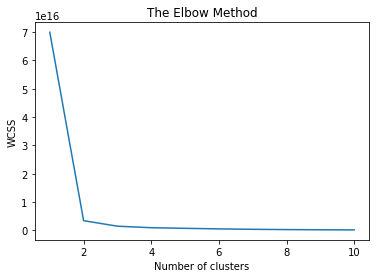

In [ ]:
#menggunakan elbow method untuk menemukan nomor cluster yang optimal menggunakan sklearn libraries
#import library
from sklearn.cluster import KMeans
#membuat array dengan nama wcss
wcss = []
#melakukan perulangan dari 1 sampai 11
for i in range(1, 11):
    #membuat nama variabel = kmeans yang mendeskripsikan jumlah cluster, perulangan k-means, dan random statenya
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
#menampilkan plot wcss

plt.plot(range(1, 11), wcss)
#memberikan label plot dengan judul The Elbow Method
plt.title('The Elbow Method')
#memberikan label x dengan nama Number of clusters
plt.xlabel('Number of clusters')
#memberikan label y dengan nama WCSS
plt.ylabel('WCSS')
#menampilkan plot
plt.show()

In [ ]:
df2 = pd.DataFrame(dfnew)

In [ ]:
clustering_kmeans = KMeans(n_clusters=2)
df2['cluster'] = clustering_kmeans.fit_predict(df2)

In [ ]:
cluster_df_2c = df2['cluster']

In [ ]:
df2.loc[df2['cluster'] == 0, 'color'] = 'r'
df2.loc[df2['cluster'] == 1, 'color'] = 'g'

In [ ]:
df2

,Lat,long,Dikonfirmasi,Sembuh,Meninggal Dunia,cluster,color
0,1.000000,0.685145,0.001841,0.013986,0.003356,0,r
1,0.684337,0.757309,1.000000,1.000000,1.000000,0,r
2,0.219438,0.762984,0.231666,0.262238,0.228188,0,r
3,0.196876,0.799976,0.184719,0.353147,0.194631,0,r
4,0.215955,0.783115,0.137465,0.178322,0.147651,0,r
5,0.339075,0.077231,0.114452,0.255245,0.100671,1,g
6,0.684337,0.752533,0.104326,0.059441,0.117450,0,r
7,0.118949,0.817324,0.045720,0.146853,0.010067,0,r
8,0.509619,1.000000,0.035901,0.097902,0.020134,0,r
9,0.684337,0.831408,0.029764,0.031469,0.020134,0,r


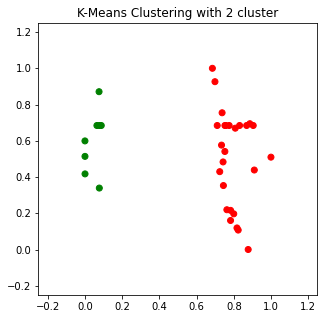

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df2['long'], df2['Lat'], color =df2['color'])
plt.title('K-Means Clustering with 2 cluster')
plt.xlim(-0.25,1.25) 
plt.ylim(-0.25,1.25)
plt.show()

In [ ]:
df2['cluster'].value_counts()

0    26
1     8
Name: cluster, dtype: int64

In [ ]:
df2.drop(df2.columns[df2.columns.str.contains('color',case = False)],axis = 1, inplace = True)

In [ ]:
silhouette_avg = metrics.silhouette_score(df2, df2['cluster'])
print ('silhouette coefficient for the clustering above = ', silhouette_avg)

silhouette coefficient for the clustering above =  0.6914937806728719
